# Visualization on avocado price

This script generates the graphs of [rank 1 R notebook](https://www.kaggle.com/janiobachmann/price-of-avocados-pattern-recognition-analysis) to practice EDA using python.

Notes:

1. Two aspects of the time series forecasting analysis:

- **Seasonal Patterns**: Iconstant patterns that occur frequently from year to year and from month to month.

- **Cyclical Patterns**: what factors could have affected the price of avocados during those years (low supply, storms etc.)

## Data Overview

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('avocado.csv', index_col = 0)
df = (df
    .assign(Date = pd.DatetimeIndex(df['Date']),
            month = pd.DatetimeIndex(df['Date']).month)            
)
df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,year_month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,2015-12-01
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,2015-12-01
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,2015-12-01
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,2015-12-01
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2015-11-01


### Types of avocado

The dataset has two types of avocados: organic and conventional. Organic avocados have the price way higher than conventionals'. Prices for two types of avocados are highly correlated and have been trending up from June to September of 2016 and 2017. 

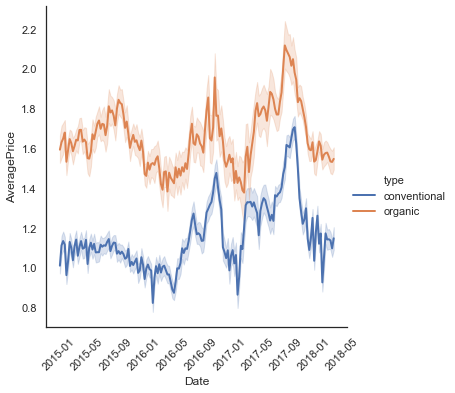

In [48]:
sns.set(style = 'white', rc = {'font.size': 3, 'lines.linewidth': 2})
sns.relplot(data = df, x = "Date", y = "AveragePrice", 
            kind = "line", hue = "type"
).set_xticklabels(rotation=45)

### Relationship between price and sales volume

In [67]:
dummy_df = (df
  .groupby(['type', 'year_month'])
  .agg('mean')
  .sort_values('year_month')
)
dummy_df.head()

,,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
type,year_month,,,,,,,,,,,
conventional,2015-01-01,1.092454,1.441463e+06,581682.054444,590712.130463,41055.743519,228013.073426,188123.179583,39247.802500,642.091343,2015,1
organic,2015-01-01,1.637639,3.115371e+04,11976.572685,12300.057361,215.624537,6661.454630,4881.988843,1779.465787,0.000000,2015,1
conventional,2015-02-01,1.055324,1.645291e+06,696747.742593,656081.156250,48174.992917,244287.283796,205193.494583,38027.151898,1066.637315,2015,2
organic,2015-02-01,1.598565,3.358660e+04,12356.417407,12139.771204,266.391944,8824.018102,6816.148796,2007.869306,0.000000,2015,2
conventional,2015-03-01,1.089889,1.515262e+06,636725.121370,584809.274556,45856.589370,247871.457148,213361.054333,33095.640296,1414.762519,2015,3
